<a href="https://colab.research.google.com/github/Nahla-yasmine/Arabic-News-Scraper/blob/main/FATABAYYANO/FATABAYANO_webscrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install selenium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00


In [2]:

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv


In [3]:

# Define column names
COLUMN_NAMES = ['Title', 'Label', 'Category', 'Content', 'Date', 'URL']

# Function to get article title from URL
def get_article_title():
    try:
        # Find and extract the title element
        title_element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'h1.w-post-elm.post_title.us_custom_d6b5cf89.entry-title.color_link_inherit')))
        title = title_element.text.strip()
        return title
    except Exception as e:
        print("An error occurred while extracting article title:", e)
        return None


In [4]:

# Function to get article info (title, content, date) from URL
def get_article_info(url):
    # Open article URL in a new tab
    driver.execute_script("window.open('" + url + "', 'new_window')")
    # Switch to the newly opened tab
    driver.switch_to.window(driver.window_handles[1])
    time.sleep(5)  # Wait for the page to load (you can adjust the waiting time as needed)
    # Extract article title
    article_title = get_article_title()
    # Extract article content
    article_content = ""
    article_date = ""
    try:
        # Wait for the article content to load
        article_content_element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.wpb_text_column.us_custom_94411672.ob-post-text')))
        paragraphs = article_content_element.find_elements(By.TAG_NAME, 'p')
        article_content = '\n'.join([p.text.strip() for p in paragraphs])
        # Extract article date
        date_element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'time.w-post-elm.post_date.us_custom_0fd75781.entry-date.published')))
        article_date = date_element.get_attribute('datetime')
    except Exception as e:
        print("An error occurred while extracting article info:", e)
    finally:
        # Close the new tab
        driver.close()
        # Switch back to the main tab
        driver.switch_to.window(driver.window_handles[0])
    return article_title, article_content, article_date


In [5]:

# Function to scrape article title, label, category, content, and URL
def scrape_article(article):
    try:
        # Extract category from article
        category_element = WebDriverWait(article, 10).until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div.w-post-elm.post_taxonomy.usg_post_taxonomy_2.style_badge.color_link_inherit')))
        category_label_element = category_element.find_element(By.CSS_SELECTOR, 'span.w-btn-label')
        category = category_label_element.text.strip()
        # Define label based on category
        label = 'رأي' if category == 'رأي' else 'صحيح' if category == 'صحيح' else 'زائف'
        # Extract title from article
        title_element = article.find_element(By.CSS_SELECTOR, 'h2.w-post-elm.post_title.usg_post_title_1.has_text_color.entry-title.color_link_inherit a')
        title = title_element.get_attribute('title')
        article_url = title_element.get_attribute('href')

        # Get article info (title, content, date) from new tab
        article_title, article_content, article_date = get_article_info(article_url)

        return article_title, label, category, article_content, article_date, article_url
    except Exception as e:
        print("An error occurred while processing an article:", e)
        return None, None, None, None, None, None


In [6]:

# Function to save data to CSV file
def save_to_csv(data):
    with open('FATABAYYANO_articles_RAW_data.csv', mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Write header row only if the file is empty
        if file.tell() == 0:
            writer.writerow(COLUMN_NAMES)
        for item in data:
            writer.writerow(item)

# Initialize the WebDriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=options)


In [ ]:

try:
    # URLs to scrape
    base_url = 'https://fatabyyano.net/page/'
    page_count = 177  # Number of pages to scrape

    for page_number in range(1, page_count + 1):
        # Initialize list to store data for this page
        data = []

        url = base_url + str(page_number) + '/'
        # Open the webpage
        driver.get(url)

        # Find and extract the news articles on the current page
        news_articles = WebDriverWait(driver, 20).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'article.w-grid-item.size_1x1')))

        # Output the articles on the current page
        for article in news_articles:
            # Scrape article title, label, category, content, date, and URL
            title, label, category, article_content, article_date, article_url = scrape_article(article)
            if title is not None:
                data.append([title, label, category, article_content, article_date, article_url])

        # Save the data to CSV file after processing each page
        save_to_csv(data)

except Exception as e:
    print("An error occurred:", e)

finally:
    # Close the WebDriver
    driver.quit()


Streaming output truncated to the last 5000 lines.
#12 0x5bbae8670571 <unknown>
#13 0x5bbae8687332 <unknown>
#14 0x5bbae865587f <unknown>
#15 0x5bbae86ad728 <unknown>
#16 0x5bbae86ad8fb <unknown>
#17 0x5bbae86bd9b4 <unknown>
#18 0x7d2d277ccac3 <unknown>

An error occurred while extracting article info: Message: 
Stacktrace:
#0 0x5bbae86be863 <unknown>
#1 0x5bbae83b48c6 <unknown>
#2 0x5bbae83ff618 <unknown>
#3 0x5bbae83ff6d1 <unknown>
#4 0x5bbae8442744 <unknown>
#5 0x5bbae84215cd <unknown>
#6 0x5bbae843fc19 <unknown>
#7 0x5bbae8421343 <unknown>
#8 0x5bbae83f2593 <unknown>
#9 0x5bbae83f2f5e <unknown>
#10 0x5bbae868284b <unknown>
#11 0x5bbae86867a5 <unknown>
#12 0x5bbae8670571 <unknown>
#13 0x5bbae8687332 <unknown>
#14 0x5bbae865587f <unknown>
#15 0x5bbae86ad728 <unknown>
#16 0x5bbae86ad8fb <unknown>
#17 0x5bbae86bd9b4 <unknown>
#18 0x7d2d277ccac3 <unknown>

An error occurred while extracting article info: Message: 
Stacktrace:
#0 0x5bbae86be863 <unknown>
#1 0x5bbae83b48c6 <unknown>
#2 0x

Head of the cleaned data:
                                               Title Label Category  \
0  لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...  زائف     زائف   
1  هذه الصورة تعود لاستعراض عسكري في كوريا الشمال...  زائف     مضلل   
2  هذه الصورة لا تظهر تنبؤ مسلسل سيمبسون بحادثة ا...  زائف     زائف   
3  قبطان السفينة التي تسببت بانهيار جسر “فرانسيس ...  زائف     مضلل   
4  هذا المقطع متداول منذ عام 2014 على الأقل، ولا ...  زائف     مضلل   

                                             Content  \
0  تناقل ناشطون على مواقع التواصل خبرًا يدّعي حظر...   
1  نشرت إحدى صفحات فيسبوك الادعاء بتاريخ 6 أفريل ...   
2  نشر أحد مستخدمي فيسبوك الصورة في 30 مارس 2024 ...   
3  نشرت إحدى حسابات فيسبوك الادعاء بتاريخ 27 مارس...   
4  نشرت إحدى حسابات فيسبوك الادعاء بتاريخ 06 أبري...   

                        Date  \
0  2024-04-12T01:59:53+03:00   
1  2024-04-12T01:44:52+03:00   
2  2024-04-12T01:38:05+03:00   
3  2024-04-10T04:43:20+03:00   
4  2024-04-10T03:27:11+03:00   

                 

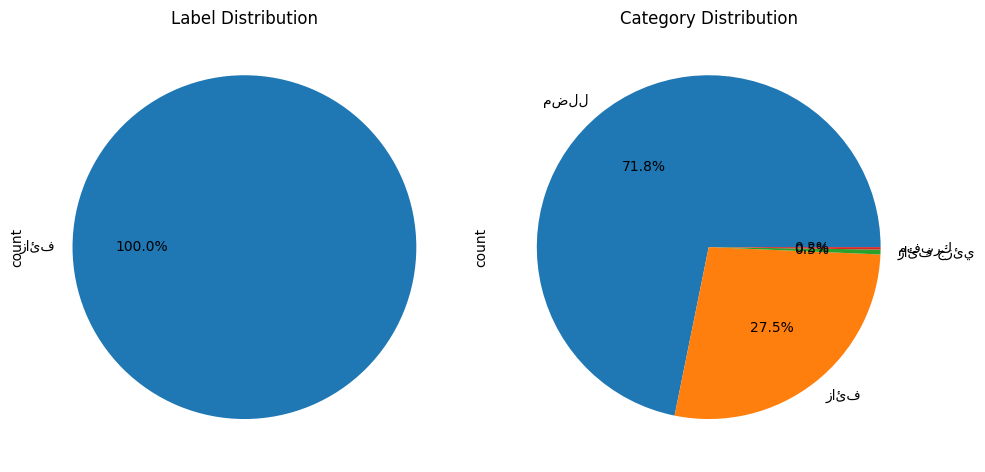

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("/content/FATABAYYANO_articles_RAW_data.csv")

# Display the head of the cleaned data
print("Head of the cleaned data:")
print(df.head())

# Display the shape of the cleaned data
print("\nShape of the cleaned data:", df.shape)
# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove rows with empty Title and blank or NA Content
df = df.dropna(subset=['Title'])
df = df[df['Content'].notna()]

# Fill empty Content with Title
df['Content'].fillna(df['Title'], inplace=True)

# Generate a new CSV file
df.to_csv("/content/FATABAYYANO_articles_cleaned_data.csv", index=False)

# Visualization
plt.figure(figsize=(10, 5))

# Pie chart for Label
plt.subplot(1, 2, 1)
df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Label Distribution')

# Pie chart for Category
plt.subplot(1, 2, 2)
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Category Distribution')

plt.tight_layout()
plt.show()


In [6]:
from transformers import pipeline
from tqdm import tqdm

# Load the CSV file into a DataFrame with specified column names
df = pd.read_csv('/content/FATABAYYANO_articles_cleaned_data.csv', names=['Title', 'Label', 'Category', 'Content', 'Date','URL'])
df.head()
print("Shape of the DataFrame :", df.shape)
# Remove rows with empty article_content
df = df[df['Content'].notna() & (df['Content'] != '')]
#df = df.dropna(subset=['article_content'])
print("Shape of the DataFrame after dropping NANS:", df.shape)
# Initialize the topic classification pipeline
topic_pipe = pipeline("text-classification", model="Ammar-alhaj-ali/arabic-MARBERT-news-article-classification")

# Function to classify the text into one of the predefined topics
def classify_topic(text):
    # Split the text into smaller chunks
    max_chunk_length = 512  # Maximum sequence length supported by the model
    chunks = [text[:max_chunk_length]]

    # Calculate the estimated time
    num_chunks = len(chunks)
    estimated_time_per_chunk = 2  # Estimated time per chunk in seconds
    total_estimated_time = num_chunks * estimated_time_per_chunk

    # Show message indicating topic prediction is in progress
    print("Predicting topics... (Estimated time: {:.2f} seconds)".format(total_estimated_time))

    # Initialize a progress bar
    with tqdm(total=num_chunks, desc="Prediction Progress") as pbar:
        # Classify the first chunk
        prediction = topic_pipe(chunks[0])

        # Update the progress bar
        pbar.update(1)

    # Get the predicted topic
    predicted_topic = prediction[0]['label']
    return predicted_topic

# Add a new column "TOPIC" to the DataFrame and populate it with topics predicted from the article content
df['TOPIC'] = df['Content'].apply(classify_topic)

# Save the DataFrame with the new column back to a CSV file with the same column names
df.to_csv('/content/FATABAYYANO_articles_cleaned_data_with_topics.csv', index=False, header=['Title', 'Label', 'Category', 'Content', 'Date','URL' ,'TOPIC'])



Shape of the DataFrame : (441, 6)
Shape of the DataFrame after dropping NANS: (441, 6)
Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


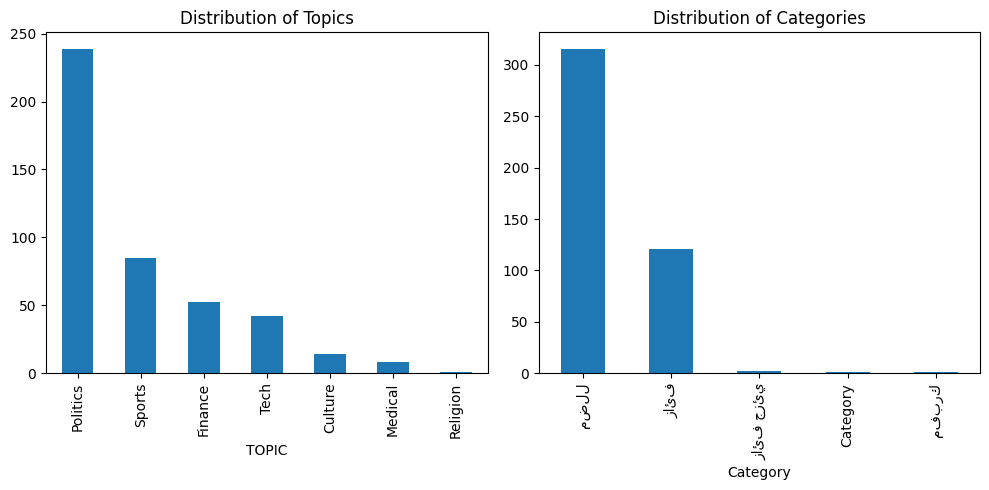

Statistics of 'TOPIC' column:
TOPIC
Politics    239
Sports       85
Finance      52
Tech         42
Culture      14
Medical       8
Religion      1
Name: count, dtype: int64

Statistics of 'TOPIC' column where Label is 'زائف':
TOPIC
Politics    239
Sports       84
Finance      52
Tech         42
Culture      14
Medical       8
Religion      1
Name: count, dtype: int64


In [7]:
# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/FATABAYYANO_articles_cleaned_data_with_topics.csv')

# Step 2: Calculate statistics for the 'TOPIC' column
topic_stats = df['TOPIC'].value_counts()

# Step 3: Plot the distribution of values for 'TOPIC' and 'Category'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['TOPIC'].value_counts().plot(kind='bar', title='Distribution of Topics')
plt.subplot(1, 2, 2)
df['Category'].value_counts().plot(kind='bar', title='Distribution of Categories')
plt.tight_layout()
plt.show()

# Step 4: Filter the DataFrame where 'Label' is equal to 'زائف'
false_label_df = df[df['Label'] == 'زائف']

# Step 5: Analyze the attributes related to the filtered topics
false_label_topic_stats = false_label_df['TOPIC'].value_counts()

# Display statistics
print("Statistics of 'TOPIC' column:")
print(topic_stats)
print("\nStatistics of 'TOPIC' column where Label is 'زائف':")
print(false_label_topic_stats)